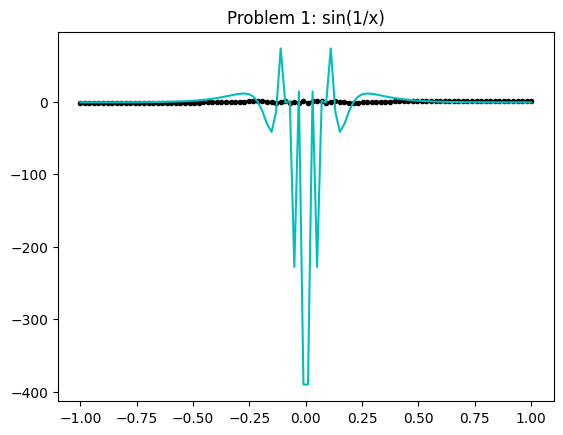

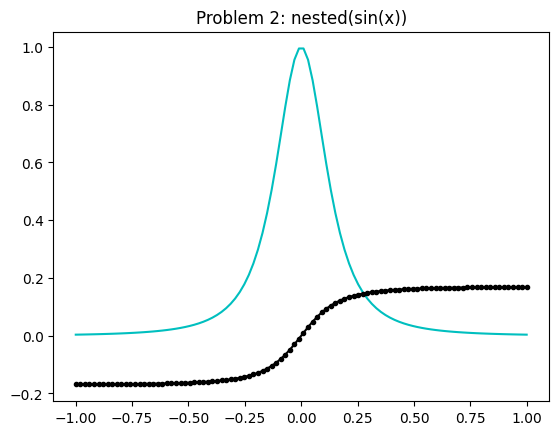



 Problem 3: the gradient is tensor([4., 6.])


Problem 4: the gradient is tensor([8.]) 




In [49]:
import torch as pt
import numpy as np
import matplotlib.pyplot as plt

x1 = np.linspace(-1,1,100)
f1 = pt.tensor(x1,requires_grad=True)
g1 = pt.sin(1/ f1)
g1.backward(pt.tensor(np.ones(100)))

plt.plot(x1,g1.detach(),"k.-")
plt.plot(x1,f1.grad.detach(),"c")
plt.title("Problem 1: sin(1/x)")
plt.show()

x2 = np.copy(x1)
f2 = pt.tensor(x2,requires_grad=True)
g2 = pt.sin(f2)

for i in range(99):
  g2 = pt.sin(g2)
g2.backward(pt.tensor(np.ones(100)))

print("\n\n")

plt.plot(x2, f2.grad.detach(),"c" )
plt.plot(x2,g2.detach(),"k.-")
plt.title("Problem 2: nested(sin(x))")
plt.show()





 Problem 3: the gradient is tensor([4., 6.])


Problem 4: the gradient is tensor([8.]) 




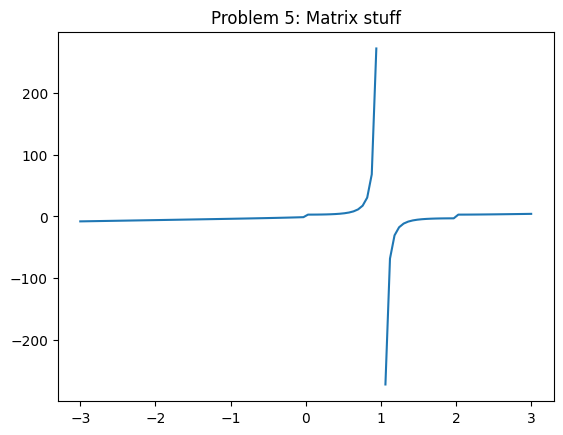

In [51]:
x3 = pt.tensor([2.,3.],requires_grad=True)

f3 = x3[0]**2 + x3[1]**2
ext = pt.tensor(1.)
f3.backward(gradient= ext)

print('\n\n Problem 3: the gradient is', x3.grad.detach())

x4 = pt.tensor([-2.],requires_grad=True)
f4a = x4**2
f4b = x4**3
f4 = pt.stack([f4a,f4b])
f4.backward(gradient=pt.tensor([[1.],[1.]]))
print('\n\nProblem 4: the gradient is', x4.grad.detach(),"\n\n")

x5 = pt.tensor(np.linspace(-3,3,100),requires_grad=True)
A = pt.stack([pt.stack([pt.ones_like(x5), x5]),
              pt.stack([2. *pt.ones_like(x5), x5**2])], dim=1)
A = A.permute(2,1,0)
b = pt.stack([pt.ones_like(x5),pt.ones_like(x5)], dim=1)
y5 = pt.linalg.solve(A,b)
f5 = 1/abs(y5)

f5.backward(pt.tensor(np.ones((100,2))))

plt.plot(x5.detach(),x5.grad.detach())
plt.title("Problem 5: Matrix stuff")
plt.show()

In [ ]:
#end